In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("Nifty 50.xlsx")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
5056,2020-05-04,9533.50,9533.50,9266.95,9293.50,NaN,NaN,21.39,2.65,1.64
5057,2020-05-05,9429.40,9450.90,9190.75,9205.60,725196178.0,2.970020e+11,21.19,2.62,1.65
5058,2020-05-06,9226.80,9346.90,9116.50,9270.90,722185448.0,3.079810e+11,21.34,2.64,1.64
5059,2020-05-07,9234.05,9277.85,9175.90,9199.05,708740416.0,5.970553e+11,21.18,2.62,1.65
5060,2020-05-08,9376.95,9382.65,9238.20,9251.50,609053504.0,3.074345e+11,21.28,2.64,1.64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5061 non-null   datetime64[ns]
 1   Open       5061 non-null   float64       
 2   High       5061 non-null   float64       
 3   Low        5061 non-null   float64       
 4   Close      5061 non-null   float64       
 5   Volume     5060 non-null   float64       
 6   Turnover   5060 non-null   float64       
 7   P/E        5061 non-null   float64       
 8   P/B        5061 non-null   float64       
 9   Div Yield  5061 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 395.5 KB


In [6]:
df.Date=pd.to_datetime(df['Date'])

In [7]:
df.Date.min(),df.Date.max()

(Timestamp('2000-01-03 00:00:00'), Timestamp('2020-05-08 00:00:00'))

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df["Volume"].fillna( method ='ffill', inplace = True)
df["Turnover"].fillna( method ='ffill', inplace = True)

In [10]:
df.head()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


<AxesSubplot:xlabel='Date'>

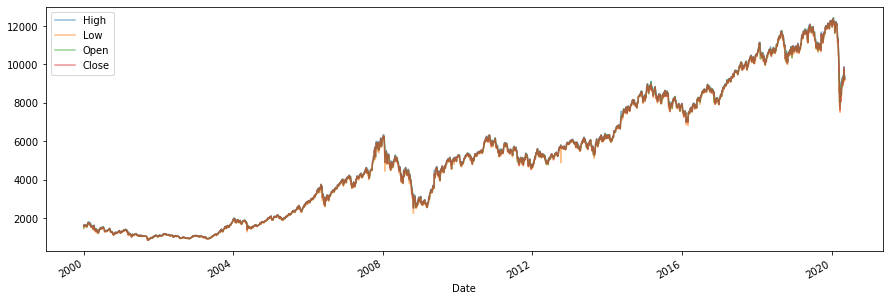

In [11]:
df[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)

In [12]:
np.round(df.shape[0]/10,0)

506.0

In [13]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(0,10):
    mean.append(df['High'].iloc[(i*182):(i*182)+182].mean())
    std.append(stdev(df['High'].iloc[(i*182):(i*182)+182]))

In [14]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,1507.479670,139.512089
1,1249.571703,87.718373
2,1064.992308,70.713528
3,1045.887088,68.475483
4,1070.341758,80.294699
5,1702.301099,196.242878
6,1750.696429,181.353253
7,2211.126648,197.277807
8,3040.116484,344.502436
9,3726.811264,317.878207


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

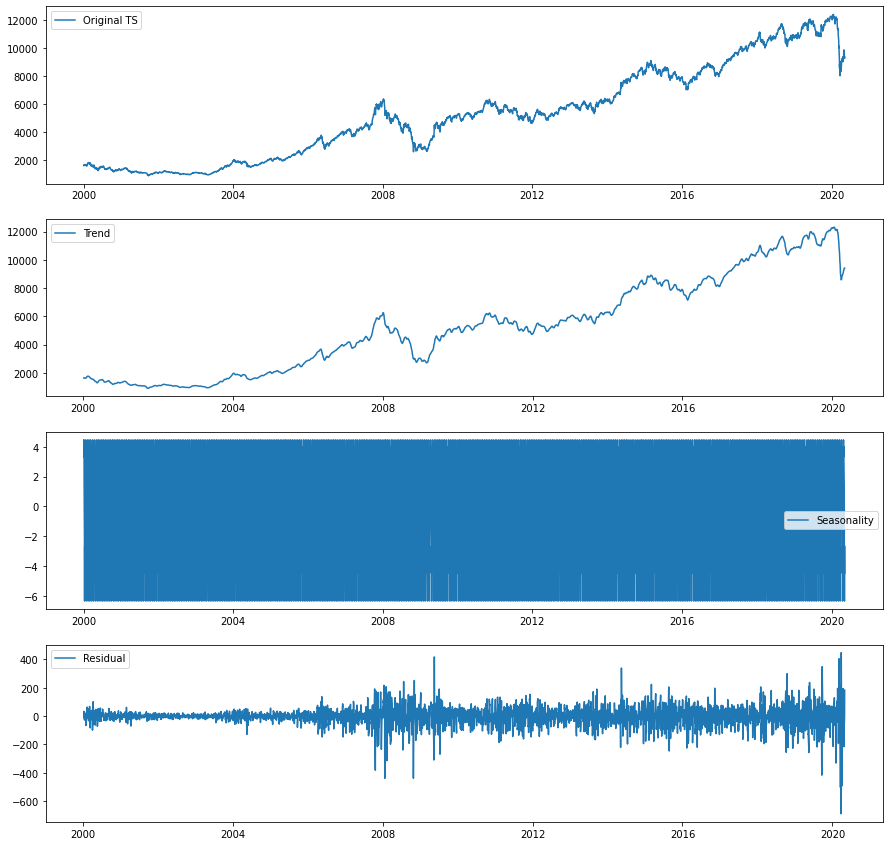

In [16]:
decompose_add=seasonal_decompose(df['High'], model='additive', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.765568
p-value: 0.829028
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


# MODELING

In [18]:
import math
new_df=df['High'].iloc[:-4]

In [19]:
train_len = math.ceil(len(new_df)*0.8)
train_len

4046

In [20]:
window=10

In [21]:
train_data = new_df[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

In [22]:
X_train, Y_train= np.array(X_train), np.array(Y_train)

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(4036, 10, 1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [25]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


In [26]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

In [27]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [28]:
X_val.shape, Y_val.shape

((1011, 10, 1), (1011,))

In [29]:
prediction = model.predict(X_val)

32/32 [==============================] - 1s 6ms/step


In [30]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

32/32 [==============================] - 0s 6ms/step
Train rmse: 108.04902127769888
Validation rmse: 201.02754157856774


In [31]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2016-03-29,7652.90,7640.860840
2016-03-30,7741.95,7623.406250
2016-03-31,7777.60,7645.959473
2016-04-01,7740.15,7675.413086
2016-04-04,7764.45,7698.288086
...,...,...
2020-04-27,9377.10,9226.942383
2020-04-28,9404.40,9250.855469
2020-04-29,9599.85,9284.301758


In [32]:
valid.tail()

,High,Predictions
Date,,
2020-04-27,9377.10,9226.942383
2020-04-28,9404.40,9250.855469
2020-04-29,9599.85,9284.301758
2020-04-30,9889.05,9359.940430
2020-05-04,9533.50,9466.422852


In [67]:
last_12_days=new_df[-12:].values
X_test=[]
X_test.append(last_12_days)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
print(pred_price)

1/1 [==============================] - 0s 48ms/step
[[9638.612]]


In [72]:
pred_price

array([[9638.612]], dtype=float32)

In [36]:
# train_error=[]
# val_error=[]

# window_number=[5,8,10,15,20,30,40]
# for i in window_number:
#     #_____________________________________________________________________
#     train_data = new_df[0:train_len]

#     X_train=[]
#     Y_train=[]

#     for i in range(window, len(train_data)):
#         X_train.append(train_data[i-window:i])
#         Y_train.append(train_data[i])

#     X_train, Y_train= np.array(X_train), np.array(Y_train)
#     X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#     #______________________________________________________________________
#     test_data = new_df[train_len-window:]

#     X_val=[]
#     Y_val=[] 

#     for i in range(window, len(test_data)):
#         X_val.append(test_data[i-window:i])
#         Y_val.append(test_data[i])

#     X_val, Y_val = np.array(X_val), np.array(Y_val)
#     X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
#     #______________________________________________________________________
#     model=Sequential()
#     model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
#     model.add(Dense(25))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
#     #______________________________________________________________________
#     lstm_train_pred = model.predict(X_train)
#     lstm_valid_pred = model.predict(X_val)
#     train_error.append(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
#     val_error.append(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

32/32 [==============================] - 0s 9ms/step


In [37]:
# pd.concat([pd.DataFrame(train_error,columns=['train_error']),
#            pd.DataFrame(val_error,columns=['val_error']),
#            pd.DataFrame([5,8,10,15,20,30,40],columns=['window'])], axis=1).set_index('window')

,train_error,val_error
window,,
5,115.455191,213.068192
8,134.195380,286.076512
10,99.718703,185.936231
15,84.039123,156.624842
20,78.731152,139.003953
30,90.657208,170.381948
40,90.804369,167.808530


In [39]:
window=10

train_data = new_df[0:train_len]
X_train=[]
Y_train=[]
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

X_train, Y_train= np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#____________________________________________________________________
test_data = new_df[train_len-window:]
X_val=[]
Y_val=[] 
for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])
    
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [40]:
from keras.optimizers import Adam
import statistics
model=Sequential()
model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1)
model.summary()
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 dense_17 (Dense)            (None, 25)                2525      
                                                                 
 dense_18 (Dense)            (None, 1)                 26        
                                                                 
Total params: 38,251
Trainable params: 38,251
Non-trainable params: 0
_________________________________________________________________


In [41]:
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

32/32 [==============================] - 0s 8ms/step
Train rmse: 74.51312229122497
Validation rmse: 148.04430394789154


In [65]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

In [78]:
last_12_days=new_df[-12:].values
X_test=[]
X_test.append(last_12_days)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
print(pred_price)

1/1 [==============================] - 0s 56ms/step
[[9638.612]]


In [83]:
actual_prices=np.array([df.High.iloc[-3], df.High.iloc[-2], df.High.iloc[-1]])
pred_prices=np.array([float(pred_price),float(pred_price2),float(pred_price3)])
actual_prices, pred_prices

data={'Actual values':[df.High.iloc[-3],df.High.iloc[-2],df.High.iloc[-1]],
      'Predicted values':[float(pred_price),float(pred_price2),float(pred_price3)]}


NameError: name 'pred_price2' is not defined

In [76]:
pd.DataFrame(data, index=['2020-05-09','2020-05-10','2020-05-11'])

,Actual values,Predicted values
2020-05-09,9450.90,9638.612305
2020-05-10,9346.90,9638.612305
2020-05-11,9277.85,9638.612305


In [61]:
actual_prices=np.array([df.High.iloc[-12],df.High.iloc[-11],df.High.iloc[-10],df.High.iloc[-9],
                        df.High.iloc[-8],df.High.iloc[-7],
                        df.High.iloc[-6],df.High.iloc[-5],df.High.iloc[-4], df.High.iloc[-3], 
                        df.High.iloc[-2], df.High.iloc[-1]])
pred_prices=np.array([float(pred_price),float(pred_price2),float(pred_price3),
                      float(pred_price4),float(pred_price5),float(pred_price6),
                      float(pred_price7),float(pred_price8),float(pred_price9),
                      float(pred_price10),float(pred_price11),float(pred_price12)])

NameError: name 'pred_price2' is not defined

In [56]:
actual_prices, pred_prices

NameError: name 'pred_prices' is not defined

In [ ]:
data={'Actual values':[df.High.iloc[-12],df.High.iloc[-11],df.High.iloc[-10],df.High.iloc[-9],df.High.iloc[-8],df.High.iloc[-7],df.High.iloc[-6],df.High.iloc[-5],df.High.iloc[-4],df.High.iloc[-3],df.High.iloc[-2]],
      'Predicted values':[float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4),float(pred_price5),float(pred_price6),float(pred_price7),float(pred_price8),float(pred_price9),float(pred_price10),float(pred_price11),float(pred_price12)]}

pd.DataFrame(data, index=['2020-05-09','2020-05-10','2020-05-11','2020-05-12','2020-05-13','2020-05-14','2020-05-15','2020-05-16','2020-05-17','2020-05-18','2020-05-19','2020-05-20'])